In [20]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
if not Path("img").exists():
    Path("img").mkdir()
    print("Created img directory")

# Strong and Weak Scaling

In [22]:
strong_scaling_df = pd.read_csv('csv/strong_scaling.csv')
weak_scaling_df = pd.read_csv('csv/weak_scaling.csv')

In [23]:
strong_scaling_df['Average wct'] = strong_scaling_df.drop(columns=['p']).mean(axis=1)
weak_scaling_df['Average wct'] = weak_scaling_df.drop(columns=['p']).mean(axis=1)

In [24]:
strong_scaling_df['speedup'] = strong_scaling_df['Average wct'][0] / strong_scaling_df['Average wct']

In [25]:
strong_scaling_df.head()

,p,t1,t2,t3,t4,t5,Average wct,speedup
0,1,14.577458,14.579865,14.120483,14.187404,14.124182,14.317878,1.000000
1,2,7.074718,7.074051,7.275541,7.062362,7.087446,7.114824,2.012401
2,3,4.725943,4.897290,4.929485,4.875601,4.723709,4.830406,2.964115
3,4,3.591323,3.602253,3.579329,3.623316,3.581115,3.595467,3.982202
4,5,2.866968,2.883959,2.897076,2.888014,2.965398,2.900283,4.936718


In [26]:
strong_scaling_df['efficiency'] = strong_scaling_df['speedup'] / strong_scaling_df['p']

weak_scaling_df['efficiency'] = weak_scaling_df['Average wct'][0] / weak_scaling_df['Average wct']

In [40]:
strong_scaling_df.head(8)

,p,t1,t2,t3,t4,t5,Average wct,speedup,efficiency
0,1,14.577458,14.579865,14.120483,14.187404,14.124182,14.317878,1.000000,1.000000
1,2,7.074718,7.074051,7.275541,7.062362,7.087446,7.114824,2.012401,1.006201
2,3,4.725943,4.897290,4.929485,4.875601,4.723709,4.830406,2.964115,0.988038
3,4,3.591323,3.602253,3.579329,3.623316,3.581115,3.595467,3.982202,0.995551
4,5,2.866968,2.883959,2.897076,2.888014,2.965398,2.900283,4.936718,0.987344
5,6,2.465045,2.470053,2.398793,2.408600,2.401518,2.428802,5.895038,0.982506
6,7,2.072323,2.074299,2.093236,2.070725,2.064011,2.074919,6.900452,0.985779
7,8,1.803928,1.859035,1.808324,1.862206,1.822619,1.831222,7.818755,0.977344


In [28]:
weak_scaling_df.head()

,p,t1,t2,t3,t4,t5,Average wct,efficiency
0,1,14.136683,14.259000,14.349611,14.626159,14.176346,14.309560,1.000000
1,2,15.124973,15.166168,14.483825,15.078520,14.567558,14.884209,0.961392
2,3,14.730957,14.639158,15.896477,14.356410,14.343660,14.793332,0.967298
3,4,14.343412,14.255921,14.264952,14.350499,14.274318,14.297820,1.000821
4,5,14.688457,14.348223,14.835277,14.788949,15.881297,14.908441,0.959829


Plot the speedup with the theoretical linear speedup as a reference.

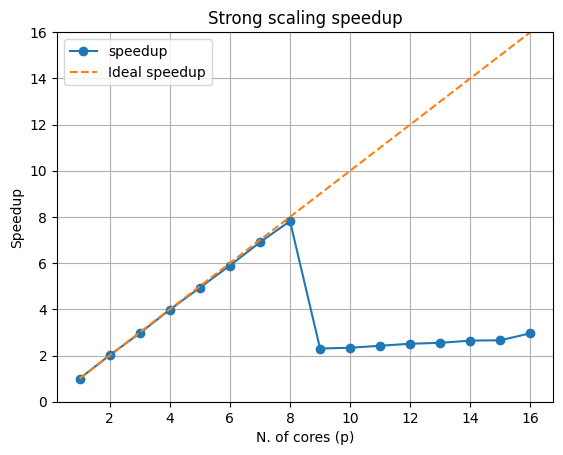

In [29]:
strong_scaling_df.plot(x='p', y='speedup', title='Strong scaling speedup', marker='o', ylim=(0, max(strong_scaling_df['p'])))
plt.plot(strong_scaling_df['p'], strong_scaling_df['p'], label='Ideal speedup', linestyle='--')
plt.xlabel('N. of cores (p)')
plt.ylabel('Speedup')
plt.legend()
plt.grid()
plt.savefig(f'img{os.sep}strong_scaling_speedup.svg', format='svg')
plt.show()

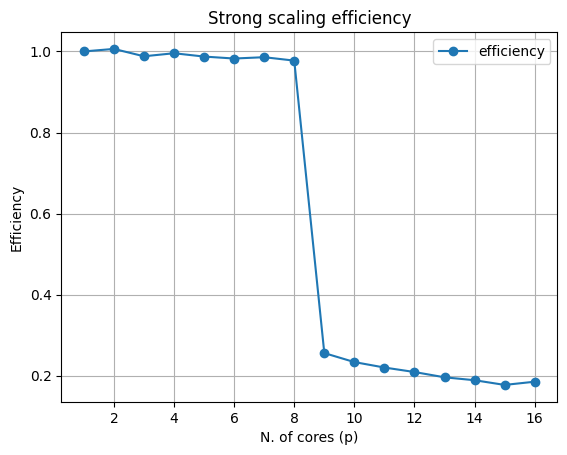

In [30]:
strong_scaling_df.plot(x='p', y='efficiency', title='Strong scaling efficiency', marker='o')
plt.xlabel('N. of cores (p)')
plt.ylabel('Efficiency')
plt.legend()
plt.grid()
plt.savefig(f'img{os.sep}strong_scaling_efficiency.svg', format='svg')
plt.show()

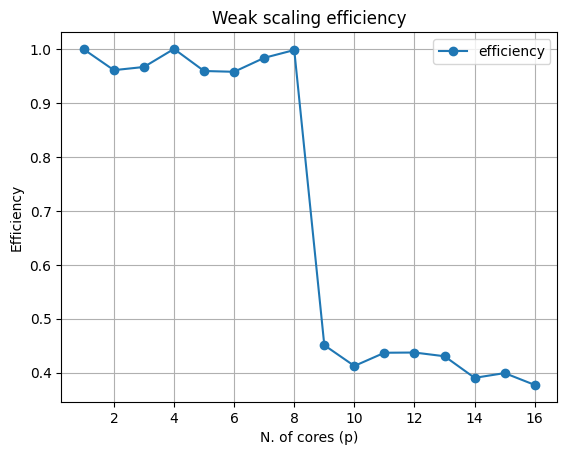

In [31]:
weak_scaling_df.plot(x='p', y='efficiency', title='Weak scaling efficiency', marker='o')
plt.xlabel('N. of cores (p)')
plt.ylabel('Efficiency')
plt.legend()
plt.grid()
plt.savefig(f'img{os.sep}weak_scaling_efficiency.svg', format='svg')
plt.show()

# CUDA Throughput

In [32]:
cuda_df = pd.read_csv('csv/cuda_perf.csv')

In [33]:
cuda_df.head()

,N,K,cpu_t1,cpu_t2,cpu_t3,cpu_t4,cpu_t5,gpu_t1,gpu_t2,gpu_t3,...,gpu_th1,gpu_th2,gpu_th3,gpu_th4,gpu_th5,gpu_th1_shared,gpu_th2_shared,gpu_th3_shared,gpu_th4_shared,gpu_th5_shared
0,65536,1000,0.125971,0.126734,0.132990,0.127153,0.126900,0.000060,0.000076,0.000056,...,1.090777e+09,8.613751e+08,1.170374e+09,1.020806e+09,1.201805e+08,1.210218e+09,1.211135e+09,1.208908e+09,1.209771e+09,1.210218e+09
1,131072,1000,0.240584,0.240321,0.240685,0.243459,0.240464,0.000056,0.000061,0.000070,...,2.323302e+09,2.136627e+09,1.871360e+09,2.074933e+09,2.364025e+09,2.421373e+09,2.350443e+09,2.420936e+09,2.421332e+09,2.420894e+09
2,262144,1000,0.465310,0.467353,0.691470,1.865854,0.565713,0.000067,0.000079,0.000063,...,3.889549e+09,3.302011e+09,4.183728e+09,3.780573e+09,3.349357e+09,4.841789e+09,4.840956e+09,4.581597e+09,4.839999e+09,4.840915e+09
3,524288,1000,0.917464,3.560781,0.983384,2.471278,2.106559,0.000058,0.000064,0.000064,...,9.053626e+09,8.197126e+09,8.183066e+09,9.180827e+09,8.064492e+09,8.247565e+09,9.577236e+09,9.566739e+09,9.672846e+09,9.679998e+09
4,1048576,1000,4.330629,4.856255,2.083632,1.825007,2.077015,0.000059,0.000071,0.000063,...,1.776918e+10,1.475564e+10,1.677268e+10,1.866947e+10,1.642774e+10,1.921774e+10,1.936349e+10,1.918957e+10,1.933108e+10,1.694637e+10


In [34]:
cuda_df['CPU Average wct'] = cuda_df[['cpu_t1','cpu_t2','cpu_t3','cpu_t4','cpu_t5']].mean(axis=1)
cuda_df['GPU Average wct'] = cuda_df[['gpu_t1','gpu_t2','gpu_t3','gpu_t4','gpu_t5']].mean(axis=1)
cuda_df['GPU Average wct shared'] = cuda_df[['gpu_t1_shared','gpu_t2_shared','gpu_t3_shared','gpu_t4_shared','gpu_t5_shared']].mean(axis=1)

cuda_df['CPU Average throughput'] = cuda_df[['cpu_th1','cpu_th2','cpu_th3','cpu_th4','cpu_th5']].mean(axis=1) / 1000000
cuda_df['GPU Average throughput'] = cuda_df[['gpu_th1','gpu_th2','gpu_th3','gpu_th4','gpu_th5']].mean(axis=1) / 1000000
cuda_df['GPU Average throughput shared'] = cuda_df[['gpu_th1_shared','gpu_th2_shared','gpu_th3_shared','gpu_th4_shared','gpu_th5_shared']].mean(axis=1) / 1000000

cuda_df['Speedup'] = cuda_df['CPU Average wct'] / cuda_df['GPU Average wct']
cuda_df['Speedup shared'] = cuda_df['CPU Average wct'] / cuda_df['GPU Average wct shared']

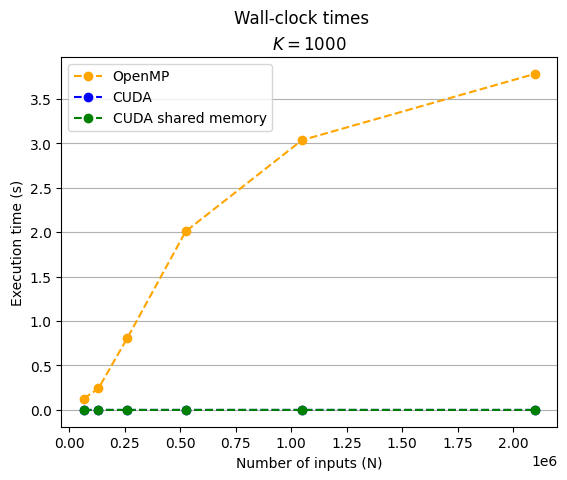

In [35]:
plt.plot(cuda_df['N'], cuda_df['CPU Average wct'], label='OpenMP', marker='o', linestyle='--', color='orange')
plt.plot(cuda_df['N'], cuda_df['GPU Average wct'], label='CUDA', marker='o', linestyle='--', color='blue')
plt.plot(cuda_df['N'], cuda_df['GPU Average wct shared'], label='CUDA shared memory', marker='o', linestyle='--', color='green')
plt.suptitle('Wall-clock times')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.ylabel('Execution time (s)')
plt.legend()
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_wct.svg', format='svg')
plt.show()

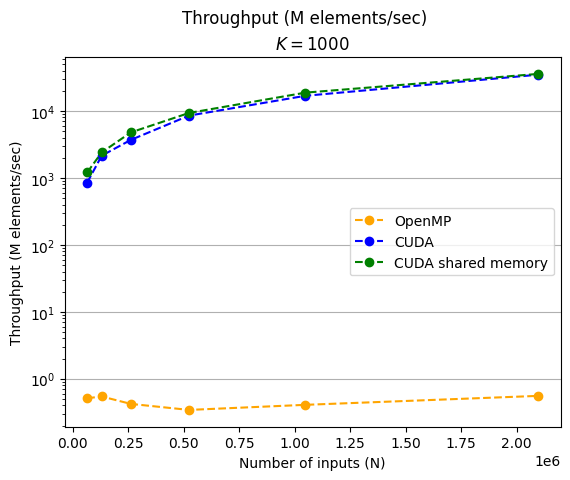

In [36]:
plt.plot(cuda_df['N'], cuda_df['CPU Average throughput'], label='OpenMP', marker='o', linestyle='--', color='orange')
plt.plot(cuda_df['N'], cuda_df['GPU Average throughput'], label='CUDA', marker='o', linestyle='--', color='blue')
plt.plot(cuda_df['N'], cuda_df['GPU Average throughput shared'], label='CUDA shared memory', marker='o', linestyle='--', color='green')
plt.suptitle('Throughput (M elements/sec)')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.ylabel('Throughput (M elements/sec)')
plt.yscale('log', base=10)
plt.legend()
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_throughput.svg', format='svg')
plt.show()

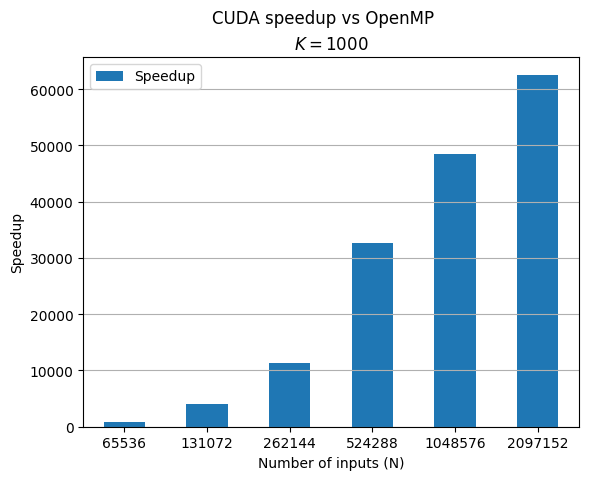

In [37]:
cuda_df.plot.bar(x='N', y='Speedup')
plt.suptitle('CUDA speedup vs OpenMP')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.xticks(rotation=0)
plt.ylabel('Speedup')
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_speedup.svg', format='svg')
plt.show()

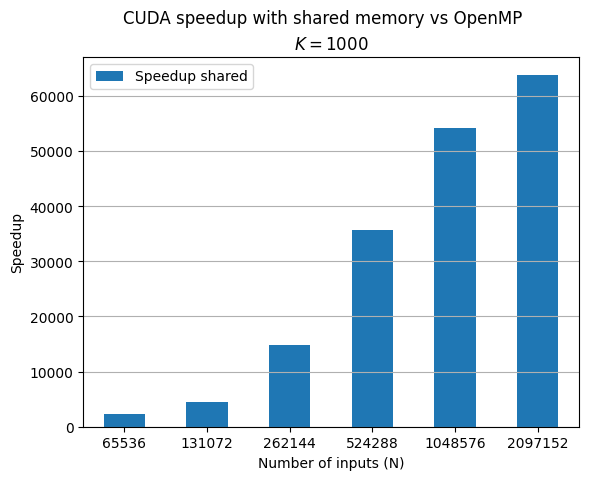

In [38]:
cuda_df.plot.bar(x='N', y='Speedup shared')
plt.suptitle('CUDA speedup with shared memory vs OpenMP')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.xticks(rotation=0)
plt.ylabel('Speedup')
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_speedup_shared.svg', format='svg')
plt.show()

In [45]:
print(f"Speedup of CUDA for N = 1048576: {cuda_df[cuda_df['N'] == 1048576]['Speedup'].values[0]:.2f}")
print(f"Speedup of CUDA with shared memory for N = 1048576: {cuda_df[cuda_df['N'] == 1048576]['Speedup shared'].values[0]:.2f}")

Speedup of CUDA for N = 1048576: 48474.56
Speedup of CUDA with shared memory for N = 1048576: 54187.64
